In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LogNorm
import seaborn as sns
datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_Torsion/'

/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_5686/1970727493.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  thing1 = np.add(np.divide(P1t0,Maxof0), np.divide(P2t0,Maxof0))
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_5686/1970727493.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before app

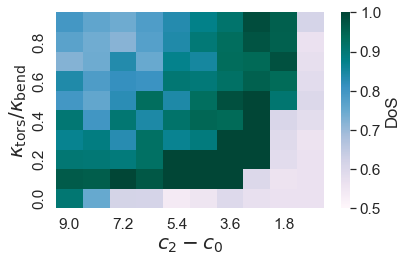

In [2]:
def DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1,Kd1s,Kd2s):
   #Defining our DoS parameter
    thing1 = np.add(np.divide(P1t0,Maxof0), np.divide(P2t0,Maxof0))
    thing2 = np.add(np.divide(P0t1,Maxof1),np.divide(P2t1,Maxof1))
    firstT = np.add(thing1,thing2)
    secondT = 2*np.add(np.divide(LastProb0,Maxof0),np.divide(LastProb1,Maxof1))
    thing4 = np.add(np.divide(Maxof0,Maxof2),np.divide(Maxof1,Maxof2))
    thirdT = (1/2)*abs(np.add(2,-thing4))
    fourthT = np.add(1,-np.divide(LastProb2,Maxof2))
    thing5add4 = np.add(fourthT,thirdT)
    lastTs = np.add(thing5add4,secondT)
    DoS_ = (1/10)*(np.add(firstT,lastTs))
    
    DoS = np.divide(1,DoS_)
    DoS_arr= DoS.values.reshape(Kd1s,Kd2s)
    
    return DoS_arr/2.1


loc = datadir +'TorsionV2CharCrvT'
n1 = 100
k1= 10
k2= 10
Maxof0_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [0])#.lstrip('(')#.rstrip(']')
Maxof0__ = np.zeros(n1)
for i in range(n1):
    Maxof0__[i] = Maxof0_[0][i].lstrip('(')
Maxof0 = Maxof0__
Maxof1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [1])
Maxof2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [2])
LastProb0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [3])
LastProb1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [4])
LastProb2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [5])
P1t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [6])
P2t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [7])
P0t1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [8])
P2t1_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [9])
P2t1__ = np.zeros(n1)
for j in range(n1):
    P2t1__[j] = P2t1_[9][j].rstrip(') ')
P2t1 = P2t1__.reshape(n1,1)
Maxof0 = Maxof0__.reshape(n1,1)

DoS = DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1,k1,k2)
y = np.arange(0.01,1.01, 0.1)
x = np.arange(9.0,0.90,-0.90)

#ktFactor = i*0.1+0.01
#Curve1 = Curve0 + 1.5 - j*0.15
#Curve2 = Curve0 + 7.0 - j*0.70

X=np.round(x,1)
Y=np.round(y,1)
sns.set(font_scale=1.4)

fig,ax = plt.subplots()
sns.heatmap(DoS,xticklabels=X, yticklabels=Y,ax = ax,cmap="PuBuGn",cbar_kws={'label': 'DoS'},vmin=0.5, vmax=1)
ax.invert_yaxis()
ax.set_ylabel("$\kappa_{\mathrm{tors}}/ \kappa_{\mathrm{bend}}$", fontsize = 20)
ax.set_xlabel("$c_{2}-c_{0}$", fontsize = 20)
#ax.set_title("Torsion and curvature differences")
n=2
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.gcf().subplots_adjust(bottom=0.2)

fname  = 'DosTorsionV2.pdf'
#fig.savefig('Plots/'+fname)
